In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotnine as p9
from plotnine import ggplot, geom_point, aes, geom_boxplot, geom_histogram, scale_size, scale_y_continuous, scale_x_continuous, geom_text,  geom_line, element_text, labs, theme_minimal, theme, scale_color_manual, theme_light, scale_x_log10, scale_size_continuous,  scale_fill_manual, annotate,  geom_bar, facet_grid

## Task 1

The aesthetic is income on the x-axis, life expectancy on the y-axis, colored by region, and the size varies according to the population of the regions

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


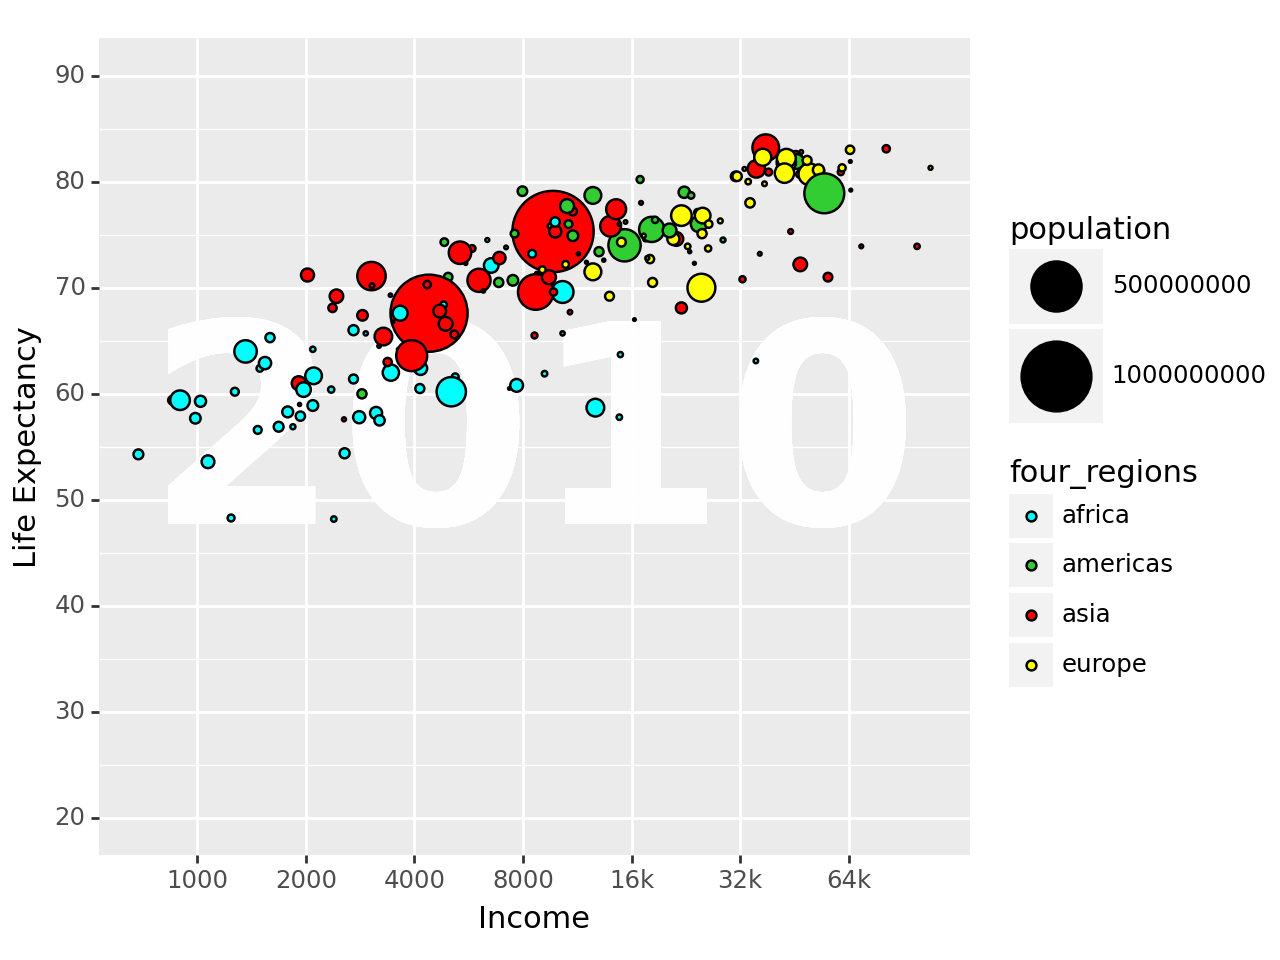

<Figure Size: (640 x 480)>

In [4]:
mydata = pd.read_csv("/content/q1data (2).csv")

mydata = mydata[mydata['four_regions'].notna()]

region_colors = {
    'asia': 'red',
    'africa': 'cyan',
    'europe': 'yellow',
    'americas': 'limegreen'
}
(
    ggplot(mydata, aes(x='income', y='life_exp', fill='four_regions', size='population')) +
    labs(x="Income", y="Life Expectancy") +
    geom_text(aes(x=8500, y=55, label="2010"), color="white", size=100, fontweight="bold", alpha=0.8) +
    geom_point(colour="black") +
    scale_size(range=[0, 16]) +
    scale_fill_manual(values=region_colors)+
    scale_y_continuous(breaks=[20, 30, 40, 50, 60, 70, 80, 90], limits=[20, 90]) +
    scale_x_continuous(trans='log2',  breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], labels=["500", "1000", "2000", "4000", "8000", "16k", "32k", "64k"])
)

Other types of geometries that could be used here in place of geom_point are geom_line (line plots), geom_boxplot (boxplots), geom_bar (bar plots), geom_histogram (histogram), geom_area (area chart), geom_tile (heatmap), geom_violin (violin plot).

I wanted to test out what a line plot would look like. For this, I customized the line colors based on 'four_regions' so they are color coded the same as the scatterplot. I also wanted to represent the differing population sizes so I tried out setting the thickness of the lines based on this variable. However, this is a bad plot becayse the thickness of the lines are not athestically pleasing and lead to a terribel visual hierarchy. Also it makes it hard to see other lines.

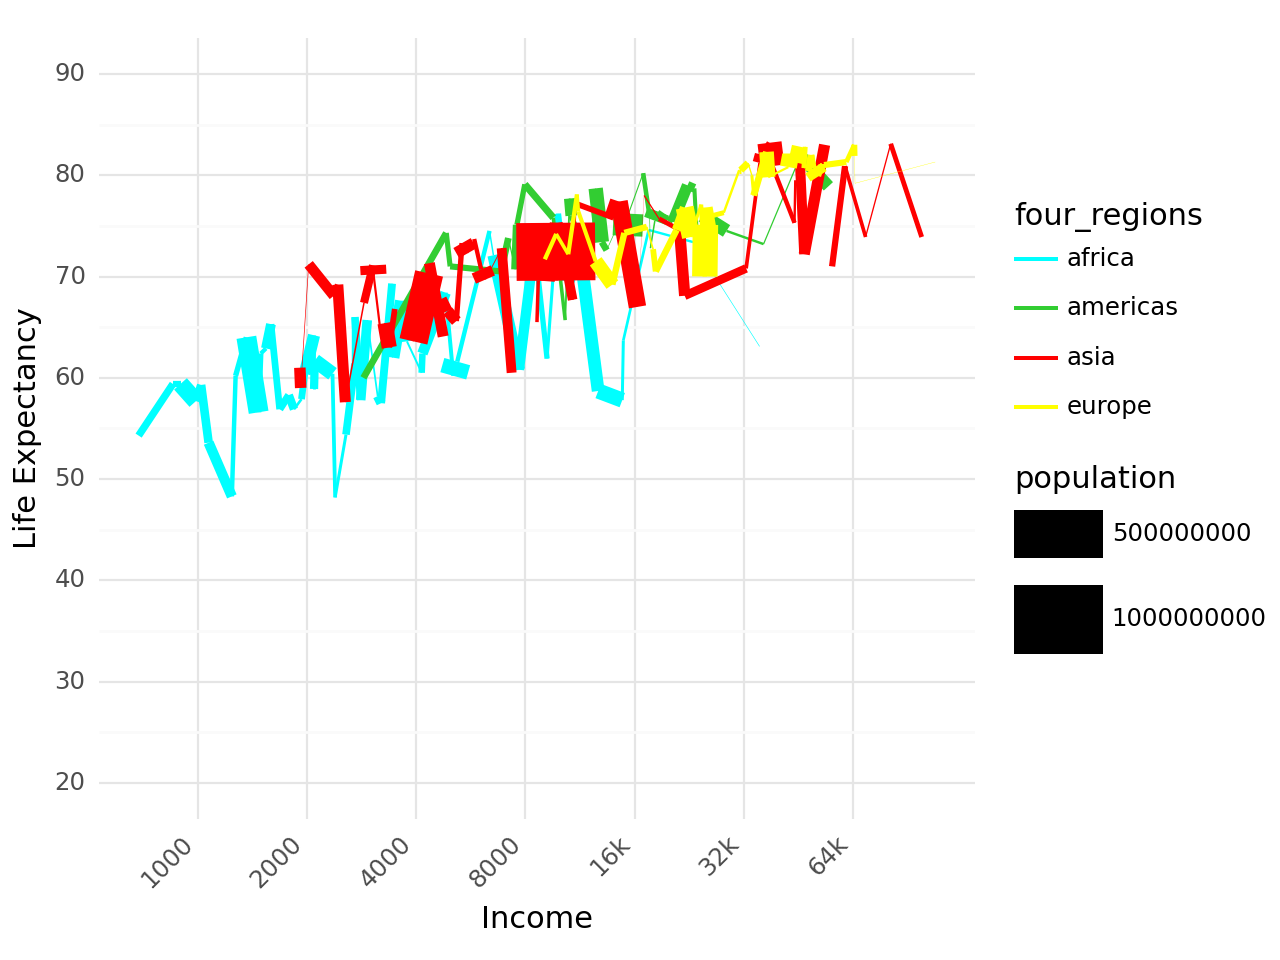

<Figure Size: (640 x 480)>

In [5]:
(
    ggplot(mydata, aes(x='income', y='life_exp', color='four_regions', size='population')) +
    geom_line() +
    labs(x="Income", y="Life Expectancy") +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +  # Rotate x-axis labels for better visibility
    scale_color_manual(values=region_colors) +  # Customize line colors based on 'four_regions'
    scale_size(range=[0, 16]) + # Set line thickness based on 'population'
    scale_y_continuous(breaks=[20, 30, 40, 50, 60, 70, 80, 90], limits=[20, 90]) +
    scale_x_continuous(trans='log2',  breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], labels=["500", "1000", "2000", "4000", "8000", "16k", "32k", "64k"])
)


## Task 2

The aesthetic is exports on the x-axis, imports on the y-axis, colored by region, and the size varies according to the energy use of the regions

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


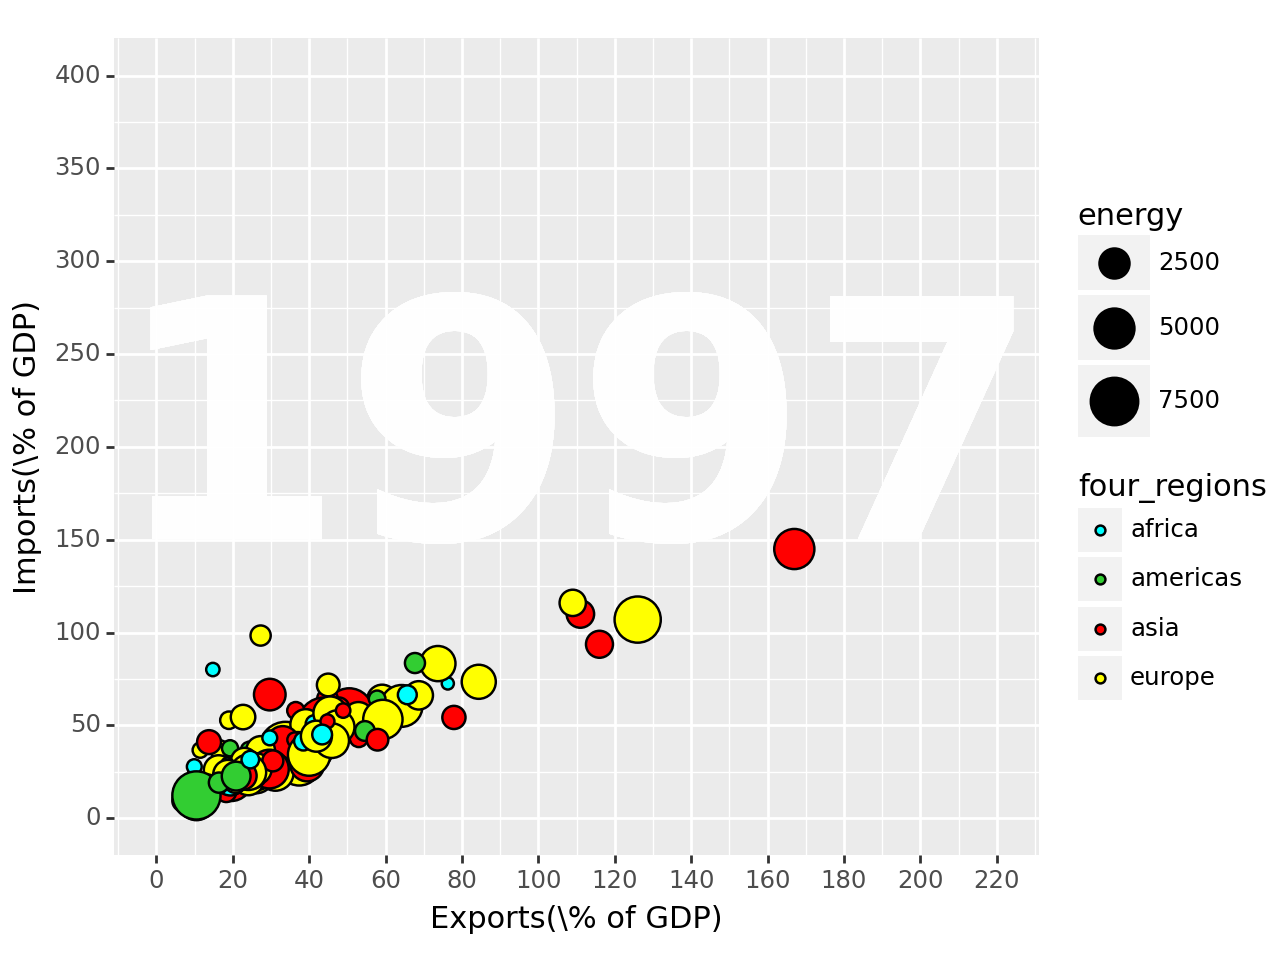

<Figure Size: (640 x 480)>

In [6]:
mydata2 = pd.read_csv("/content/q2data (2).csv")

mydata2 = mydata2[mydata2['four_regions'].notna()]
mydata2['energy'] = pd.to_numeric(mydata2['energy'], errors='coerce')
mydata2 = mydata2[mydata2['energy'].notna()]


(
        ggplot(mydata2, aes(x='exports', y='imports', fill='four_regions', size='energy')) +
        geom_text(aes(x=110, y=200, label="1997"), color="white", size=120, fontweight="bold", alpha=0.8) +
        scale_size_continuous(range=[1, 10]) +
        geom_point(colour="black") +
        labs(x="Exports(\% of GDP)", y="Imports(\% of GDP)") +
        scale_fill_manual(values=region_colors) +
        scale_x_continuous(limits=[0, 220], breaks=range(0, 221, 20)) +
        scale_y_continuous(limits=[0, 400], breaks=range(0, 401, 50))
)



Similar to the plot in task 1, instead of creating a scatterplot we could also make plot using geom_line (line plots), geom_boxplot (boxplots), geom_bar (bar plots), geom_histogram (histogram), geom_area (area chart), geom_tile (heatmap), geom_violin (violin plot) provided by plotnine.

Here I wanted to try to see what a barplot of the imports and exports would look like. I also tried to color the lines based on the region to better interpret the plot. However, this is not the best way to visualize this data there are too many vairables and they all get jumbled up making it hard to compare them.


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 3 rows containing missing values.
/usr/local/lib/python3.10/dist-packages/plotnine/positions/position.py:229: PlotnineWarning: position_stack requires non-overlapping x intervals
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 128 rows containing missing values.


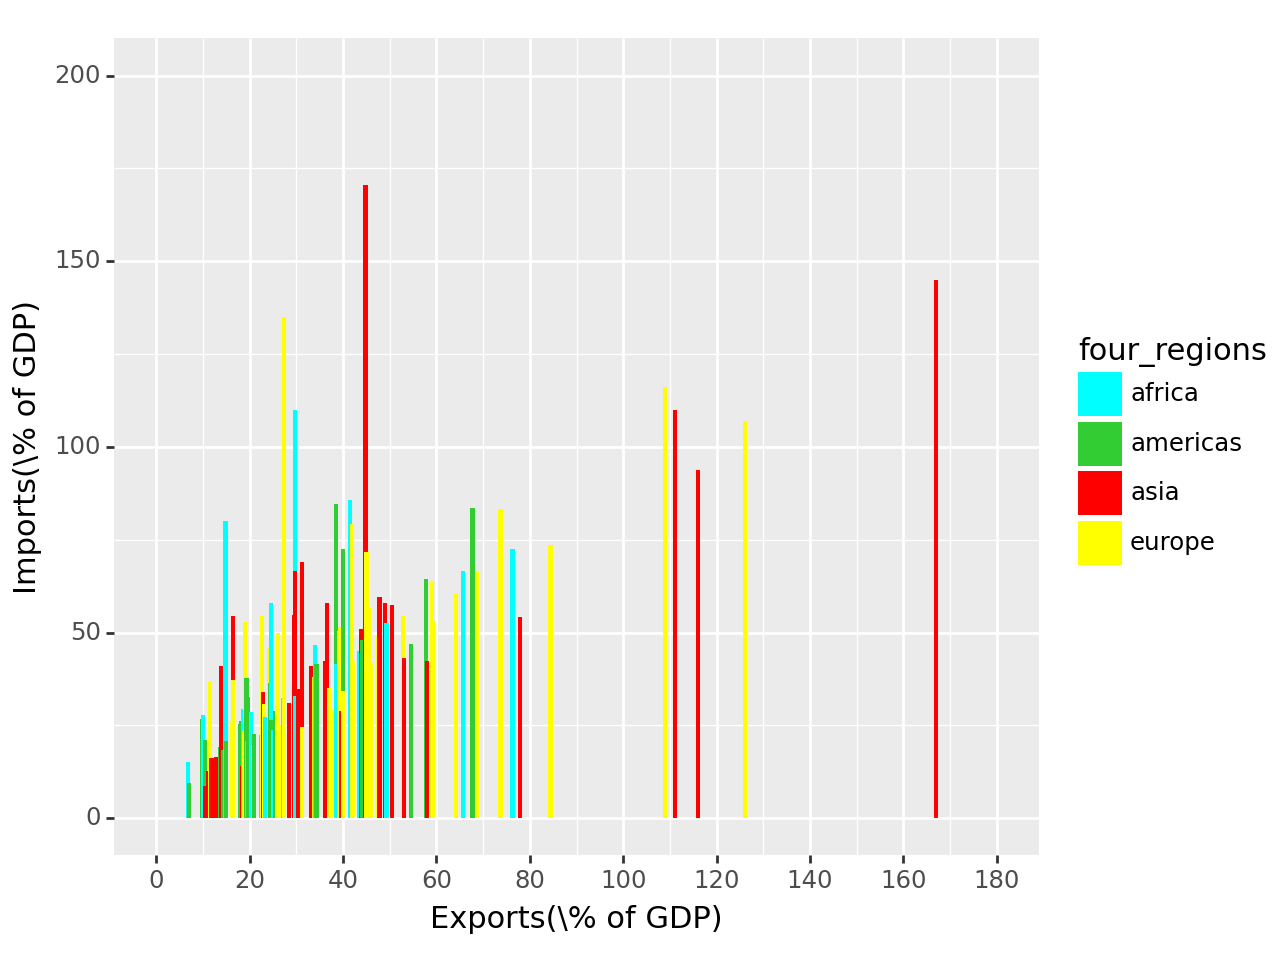

<Figure Size: (640 x 480)>

In [7]:
(
    ggplot(mydata2, aes(x='exports', y='imports', fill='four_regions')) +
    geom_bar(stat='identity') +
    annotate('text', x=mydata2['exports'], y=mydata2['imports'] + mydata2['energy'],
             label=mydata2['energy'].astype(int).astype(str), size=5, color='black') +
    labs(x="Exports(\% of GDP)", y="Imports(\% of GDP)") +
    scale_fill_manual(values=region_colors) +
    scale_x_continuous(limits=[0, 180], breaks=range(0, 181, 20)) +
    scale_y_continuous(limits=[0, 200], breaks=range(0, 201, 50))

)


## Task 3

The aesthetic is individuals using internet on the x-axis, GPD per capita on the y-axis, colored by region, and the size varies according to the income of the regions

In [8]:
mydata3 = pd.read_csv("/content/q3data (2).csv")
mydata3

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


<ipython-input-9-e460125a5f86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


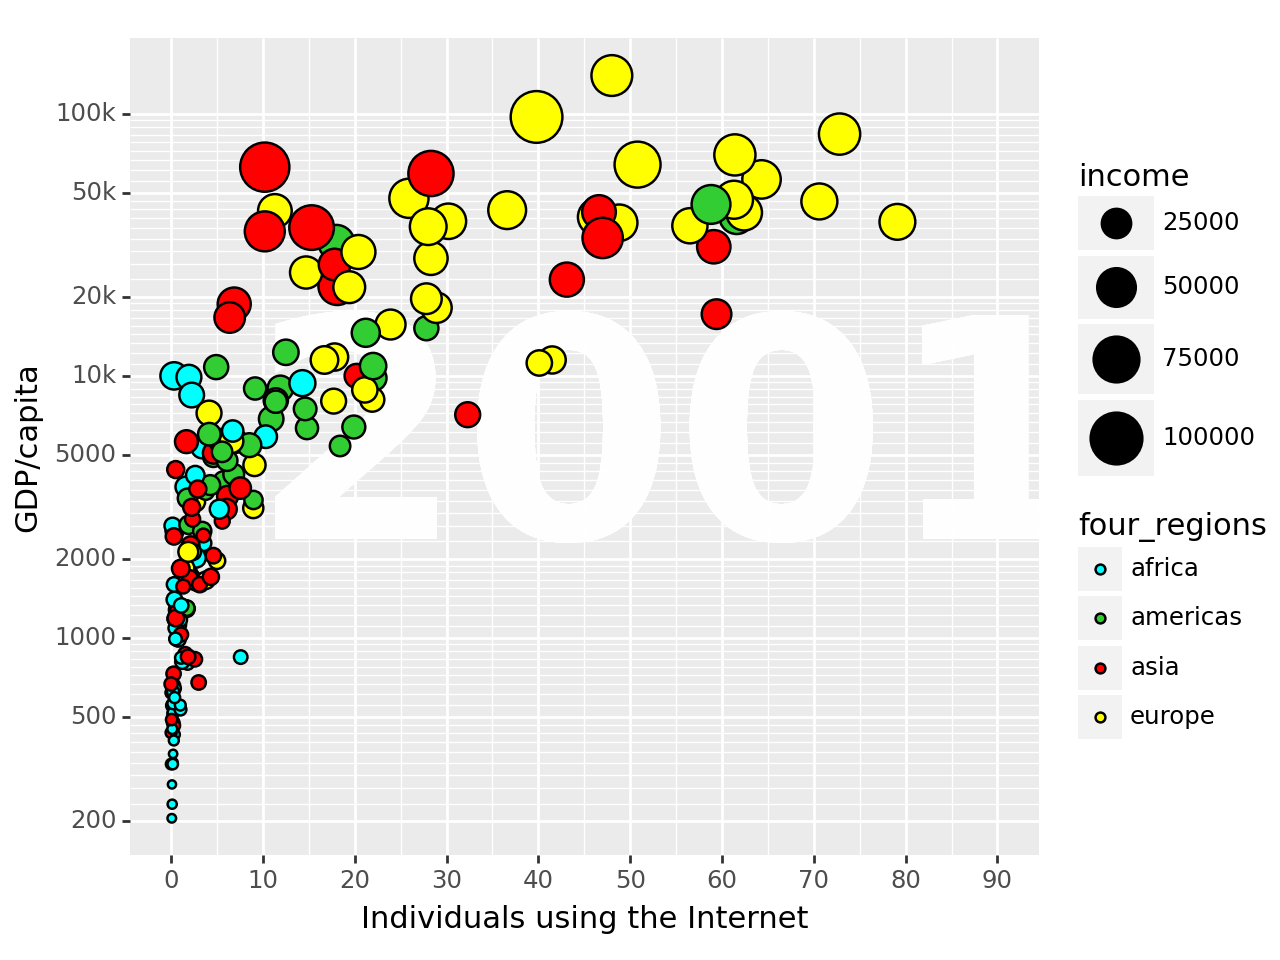

<Figure Size: (640 x 480)>

In [9]:
mydata3 = mydata3[mydata3['four_regions'].notna()]
mydata3['income'] = pd.to_numeric(mydata3['income'], errors='coerce')
mydata3 = mydata3[mydata3['income'].notna()]

(
        ggplot(mydata3, aes(x='internet_users', y='gdp', fill='four_regions', size='income')) +
        geom_text(aes(x=55, y=5000, label="2001"), color="white", size=110, fontweight="bold", alpha=0.8) +
        geom_point(colour="black") +
        scale_size_continuous(range=[1, 10]) +
        labs(x="Individuals using the Internet", y="GDP/capita") +
        scale_fill_manual(values=region_colors) +
        scale_x_continuous(breaks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], limits=[0, 90]) +
        scale_y_continuous(trans='log10',  breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], labels=['200', '500', '1000', '2000', '5000', '10k', '20k', '50k', '100k'])
)

Same as the two plots in task 1 and task 2, instead of creating a scatterplot we could also make various plots using geom_line (line plots), geom_boxplot (boxplots), geom_bar (bar plots), geom_histogram (histogram), geom_area (area chart), geom_tile (heatmap), geom_violin (violin plot) provided by the plotnine package instead of geom_point.

Here I wanted to try to see how boxplots would look. The most benefitial part of using a boxplot of this graph is the fact that you can visuially see the variation of the inter quartile range. On the other hand the box plot does not give the size of the income.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 19 rows containing non-finite values.


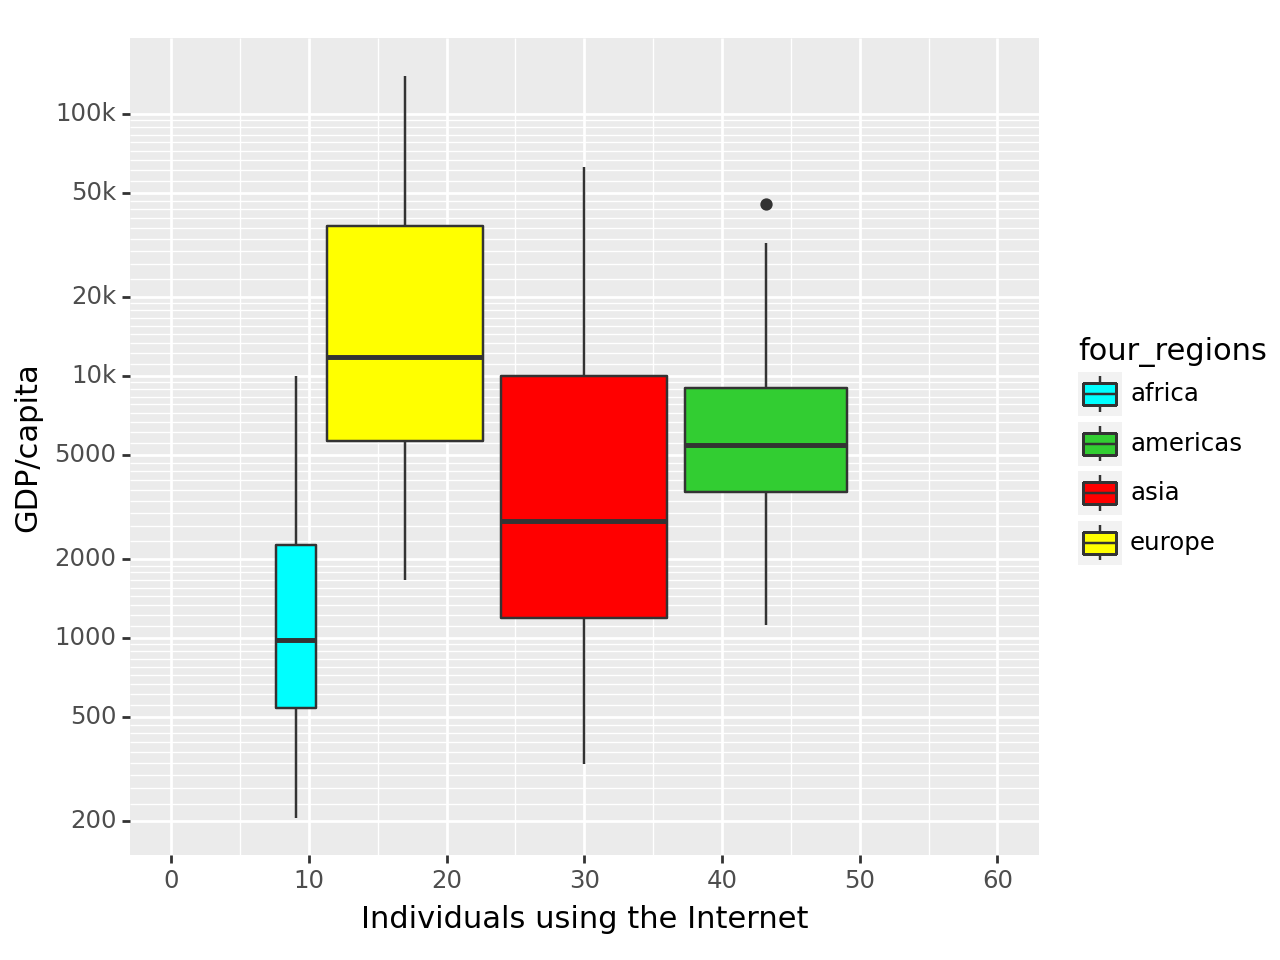

<Figure Size: (640 x 480)>

In [10]:
(
    ggplot(mydata3, aes(x='internet_users', y='gdp', fill='four_regions')) +
    geom_boxplot() +
    labs(x="Individuals using the Internet", y="GDP/capita") +
    scale_fill_manual(values=region_colors) +
    scale_x_continuous(breaks=[0, 10, 20, 30, 40, 50, 60], limits=[0, 60]) +
    scale_y_continuous(trans='log10',  breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], labels=['200', '500', '1000', '2000', '5000', '10k', '20k', '50k', '100k'])
)
